<a href="https://colab.research.google.com/github/DannaArciniega22/Actividad-7-Regresion-Logistica-/blob/main/Actividad_7_%7C_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**DOCUMENTO 1 | BD_Socio formador (TrainingDataComplete)**

In [ ]:
#INSTALAR LIBRERIA PARA ANÁLISIS DE VARIABLES CATEGORICAS
%pip install funpymodeling

In [ ]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#CARGA DESDE UN ARCHIVO .csv SIN INDICE
df = pd.read_csv('BD_Socio formador (TrainingDataComplete).csv', index_col='Id')
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#OBTENER INFORMACION DEL DATA FRAME
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


##**Valores Nulos**

In [ ]:
#IDENTIFICAR VALORES NULOS POR COLUMNA
valores_nulos=df.isnull().sum()
valores_nulos

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

No hay valores nulos en el Data Frame

##**Valores Atípicos**

In [ ]:
#REALIZAR UNA COPIA DEL DATAFRAME
df1=df.copy()

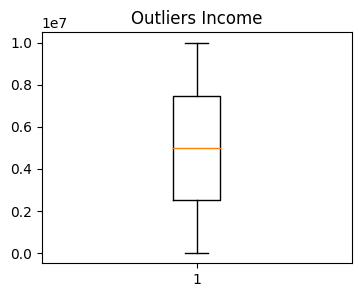

In [ ]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["Income"])
plt.title('Outliers Income')
plt.show()

#RESULTADO: No se Identifican Outliers

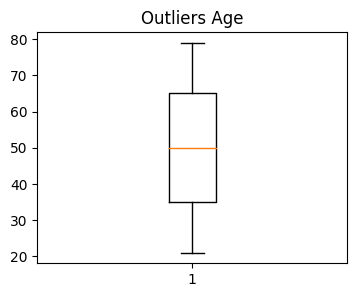

In [ ]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["Age"])
plt.title('Outliers Age')
plt.show()

#RESULTADO: No se Identifican Outliers

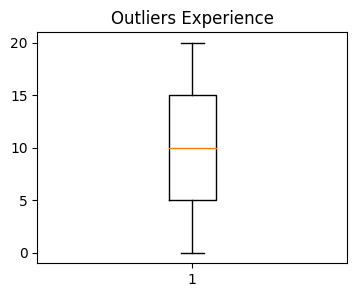

In [ ]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["Experience"])
plt.title('Outliers Experience')
plt.show()

#RESULTADO: No se Identifican Outliers

Text(0, 0.5, 'Cantidad')

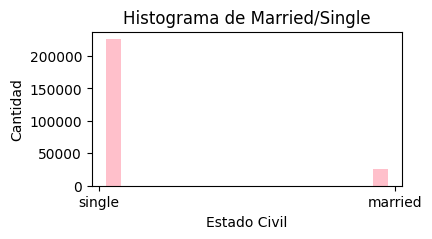

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(4,2))
plt.hist(x=df1["Married/Single"],color='pink',rwidth=0.50)
plt.title('Histograma de Married/Single')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

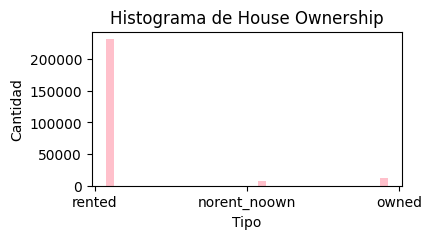

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(4,2))
plt.hist(x=df1["House_Ownership"],color='pink',rwidth=0.25)
plt.title('Histograma de House Ownership')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')


Text(0, 0.5, 'Cantidad')

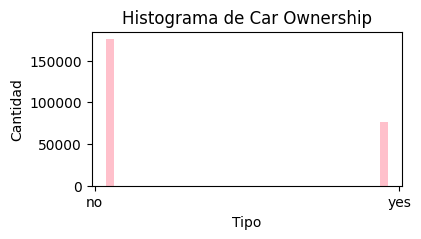

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(4,2))
plt.hist(x=df1["Car_Ownership"],color='pink',rwidth=0.25)
plt.title('Histograma de Car Ownership')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Frecuecia')

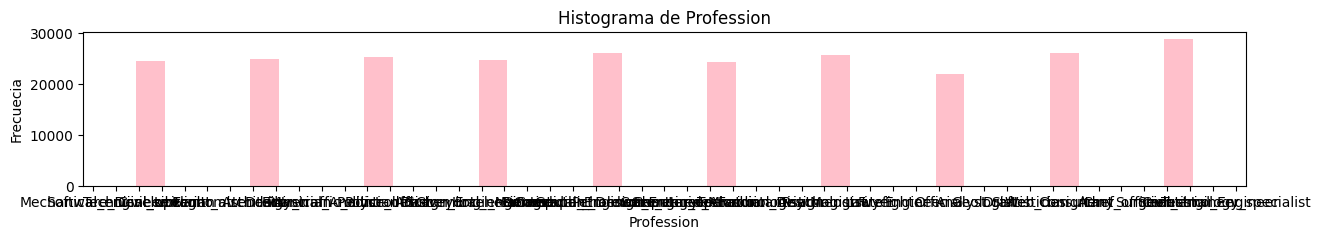

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(15,2))
plt.hist(x=df1["Profession"],color='pink',rwidth=0.25)
plt.title('Histograma de Profession')
plt.xlabel('Profession')
plt.ylabel('Frecuecia')

Text(0, 0.5, 'Frecuecia')

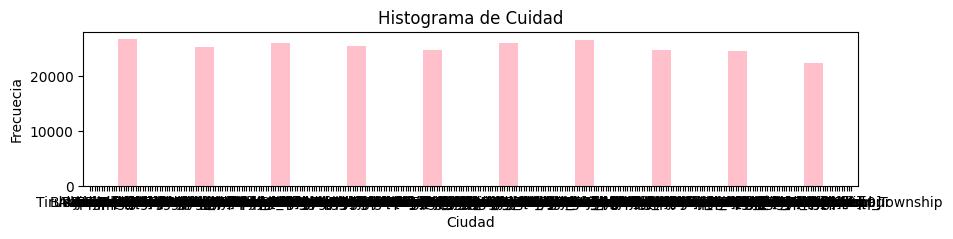

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(10,2))
plt.hist(x=df1["CITY"],color='pink',rwidth=0.25)
plt.title('Histograma de Cuidad')
plt.xlabel('Ciudad')
plt.ylabel('Frecuecia')

Text(0, 0.5, 'Frecuecia')

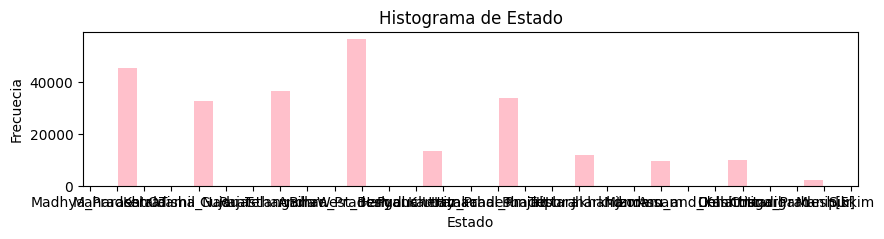

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(10,2))
plt.hist(x=df1["STATE"],color='pink',rwidth=0.25)
plt.title('Histograma de Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuecia')

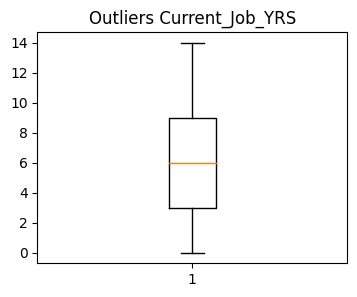

In [ ]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["CURRENT_JOB_YRS"])
plt.title('Outliers Current_Job_YRS')
plt.show()

#RESULTADO: No se Identifican Outliers

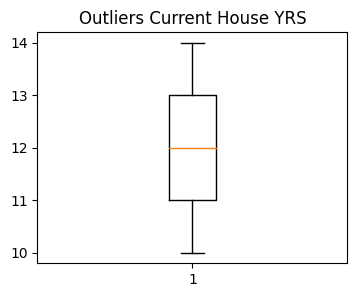

In [ ]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["CURRENT_HOUSE_YRS"])
plt.title('Outliers Current House YRS')
plt.show()

#RESULTADO: No se Identifican Outliers

Text(0, 0.5, 'Frecuecia')

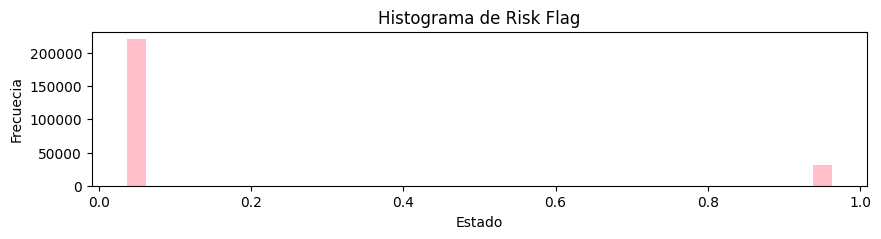

In [ ]:
#HISTOGRAMA DE VARIABLES CUANTITATIVAS
fig = plt.figure(figsize=(10,2))
plt.hist(x=df1["Risk_Flag"],color='pink',rwidth=0.25)
plt.title('Histograma de Risk Flag')
plt.xlabel('Estado')
plt.ylabel('Frecuecia')

##**Remplazar Valores**

##**Regresion Logistica**

In [ ]:
df_nuevo=df.copy()

In [ ]:
unico= np.unique(df['Profession'])
unico

##**Regresion Logistica - Función**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def entrenar_evaluar_modelo(X, y, pos_label, test_size=0.3, random_state=None):
    # Dividimos el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Escalamos los datos
    escalar = StandardScaler()
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    # Definimos el algoritmo de regresión logística
    algoritmo = LogisticRegression()

    # Entrenamos el modelo
    algoritmo.fit(X_train, y_train)

    # Realizamos una predicción
    y_pred = algoritmo.predict(X_test)

    # Calculamos las métricas de evaluación
    matriz = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=pos_label)
    exactitud = accuracy_score(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred, average='binary', pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=pos_label)

    print('Matriz de confusión:')
    print(matriz)
    print('\nPrecisión del modelo:')
    print(precision)
    print('\nExactitud del modelo:')
    print(exactitud)
    print('\nSensibilidad del modelo:')
    print(sensibilidad)
    print('\nPuntuación F1 del modelo:')
    print(f1)

    return X_train, X_test, y_train, y_test, y_pred


In [ ]:
#PRIMER FILTRO
df_profesion_1= df[(df["Profession"]== 'Psychologist') | (df["Profession"] == 'Computer_hardware_engineer')]
df_profesion_1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
33,4128828,21,10,single,rented,no,Computer_hardware_engineer,Khammam,Telangana,10,12,0
55,1213131,67,8,single,rented,no,Psychologist,Agartala,Tripura,8,11,0
97,3449511,50,19,single,rented,yes,Computer_hardware_engineer,Rajpur_Sonarpur,West_Bengal,3,14,0
116,5522159,22,6,single,rented,no,Computer_hardware_engineer,Anantapur,Andhra_Pradesh,6,12,1
121,8769550,23,13,single,rented,no,Computer_hardware_engineer,Ghaziabad,Uttar_Pradesh,9,10,1


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_1[['Income']]
Var_Dep= df_profesion_1['Profession']

# Llama a la función pasando tus variables independientes (X), variables dependientes (y), y etiqueta positiva
X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Computer_hardware_engineer')

Matriz de confusión:
[[815 838]
 [608 968]]

Precisión del modelo:
0.5727336612789881

Exactitud del modelo:
0.5521833384948901

Sensibilidad del modelo:
0.49304295220810646

Puntuación F1 del modelo:
0.5299089726918075


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_1[['Income','Age']]
Var_Dep= df_profesion_1['Profession']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Psychologist')

Matriz de confusión:
[[773 857]
 [667 932]]

Precisión del modelo:
0.5209614309670206

Exactitud del modelo:
0.5280272530195107

Sensibilidad del modelo:
0.5828642901813633

Puntuación F1 del modelo:
0.550177095631641


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_1[['Income','Age', 'Experience']]
Var_Dep= df_profesion_1['Profession']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Computer_hardware_engineer')

Matriz de confusión:
[[873 712]
 [802 842]]

Precisión del modelo:
0.5211940298507463

Exactitud del modelo:
0.5311241870548157

Sensibilidad del modelo:
0.5507886435331231

Puntuación F1 del modelo:
0.5355828220858896


In [ ]:
#SEGUNDO FILTRO
df_profesion_2= df[(df["Profession"]== 'Statistician') | (df["Profession"] == 'Drafter')]
df_profesion_2.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
79,326455,27,20,single,rented,no,Drafter,Asansol,West_Bengal,3,14,0
90,6097344,27,16,single,rented,yes,Statistician,Kottayam,Kerala,10,14,0
99,5083653,35,14,single,rented,yes,Statistician,Ambattur,Tamil_Nadu,12,11,0
198,6816106,31,20,single,rented,yes,Statistician,Adoni,Andhra_Pradesh,11,14,0
232,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_2[['Income','Age', 'Experience']]
Var_Dep= df_profesion_2['Profession']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Statistician')

Matriz de confusión:
[[ 638  976]
 [ 584 1152]]

Precisión del modelo:
0.5413533834586466

Exactitud del modelo:
0.5343283582089552

Sensibilidad del modelo:
0.663594470046083

Puntuación F1 del modelo:
0.5962732919254657


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_2[['Experience']]
Var_Dep= df_profesion_2['Profession']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Statistician')

Matriz de confusión:
[[ 257 1357]
 [ 305 1431]]

Precisión del modelo:
0.513271162123386

Exactitud del modelo:
0.5038805970149254

Sensibilidad del modelo:
0.8243087557603687

Puntuación F1 del modelo:
0.6326259946949602


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_profesion_2[['Experience','Age','Income']]
Var_Dep= df_profesion_2['Profession']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Drafter')

Matriz de confusión:
[[ 615  995]
 [ 525 1215]]

Precisión del modelo:
0.5394736842105263

Exactitud del modelo:
0.5462686567164179

Sensibilidad del modelo:
0.38198757763975155

Puntuación F1 del modelo:
0.44727272727272727


In [ ]:
unico= np.unique(df['CITY'])
unico

In [ ]:
#TERCER FILTRO
df_CITY= df[(df["CITY"]== 'Indore') | (df["CITY"] == 'Bhopal')]
df_CITY.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience,new_Age
Id,,,,,,,,,,,,,,
28,9643150,24,13,single,rented,no,Comedian,Indore,Madhya_Pradesh,6,14,0,0,1
88,4047079,49,7,single,rented,yes,Dentist,Indore,Madhya_Pradesh,5,14,0,1,1
192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1,0,0
219,7357515,50,13,single,rented,yes,Fashion_Designer,Bhopal,Madhya_Pradesh,7,14,0,0,0
236,7167762,49,14,single,rented,no,Firefighter,Bhopal,Madhya_Pradesh,12,14,1,0,1


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_CITY[['Age','Income','CURRENT_HOUSE_YRS']]
Var_Dep= df_CITY['CITY']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Bhopal')

Matriz de confusión:
[[232 153]
 [110 207]]

Precisión del modelo:
0.6783625730994152

Exactitud del modelo:
0.6253561253561254

Sensibilidad del modelo:
0.6025974025974026

Puntuación F1 del modelo:
0.6382393397524072


In [ ]:
#CUARTO FILTRO
df_City1= df[(df["CITY"]== 'Karaikudi') | (df["CITY"] == 'Katni')]
df_City1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience,new_Age
Id,,,,,,,,,,,,,,
937,5069739,40,1,single,rented,no,Design_Engineer,Karaikudi,Tamil_Nadu,1,11,0,1,1
1355,3656909,68,14,single,rented,no,Politician,Katni,Madhya_Pradesh,4,14,0,0,0
2060,2548584,42,13,single,rented,no,Magistrate,Karaikudi,Tamil_Nadu,13,13,0,0,1
2074,800497,49,20,single,rented,no,Army_officer,Katni,Madhya_Pradesh,8,14,0,0,1
2382,8426506,68,1,single,rented,yes,Biomedical_Engineer,Katni,Madhya_Pradesh,1,12,0,1,0


In [ ]:
Vars_Indep= df_City1[['Age','Income','CURRENT_HOUSE_YRS']]
Var_Dep= df_City1['CITY']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label='Karaikudi')

Matriz de confusión:
[[69 64]
 [53 78]]

Precisión del modelo:
0.5655737704918032

Exactitud del modelo:
0.5568181818181818

Sensibilidad del modelo:
0.518796992481203

Puntuación F1 del modelo:
0.5411764705882353


Filtramos los datos en donde 18 y 12 son los años que mayor experiencia se tiene, en este caso se comparo con edad y si cuantan con vivienda o no.

In [ ]:
#QUINTO FILTRO
df_experience= df[(df["Experience"]== 18) | (df["Experience"] == 16)]
df_experience.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience,new_Age
Id,,,,,,,,,,,,,,
30,4386333,31,16,single,rented,no,Physician,Shimoga,Karnataka,3,12,0,0,1
46,6868118,25,16,single,rented,no,Secretary,Danapur,Bihar,13,13,1,0,1
47,2471915,73,18,single,rented,no,Chemical_engineer,Purnia[26],Bihar,14,13,0,0,0
50,4043791,48,18,single,rented,yes,Architect,Malda,West_Bengal,13,14,0,0,1
56,1885923,46,16,single,rented,no,Magistrate,Thanjavur,Tamil_Nadu,8,14,1,0,1


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_experience[['Age','CURRENT_JOB_YRS']]
Var_Dep= df_experience['Experience']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label=16)

Matriz de confusión:
[[ 953 2691]
 [ 895 2874]]

Precisión del modelo:
0.5156926406926406

Exactitud del modelo:
0.5162552273033859

Sensibilidad del modelo:
0.2615257958287596

Puntuación F1 del modelo:
0.3470502549162418


Filtramos los datos en donde 0 y 2 son los años que menor experiencia se tiene, en este caso se comparo con edad y si cuantan con vivienda o no, para poder tener como punto de compraracion con la anterior. Al realizar este filtro pudimos darnos cuenta de que la mayoria de personas que tenian de 0 a 10 años de experiencia era en su actual trabajo.

In [ ]:
#QUINT0 FILTRO
df_experience1= df[(df["Experience"]== 0) | (df["Experience"] == 13)]
df_experience1.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience,new_Age
Id,,,,,,,,,,,,,,
6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0,1,0
23,9157379,72,13,single,rented,yes,Design_Engineer,Ajmer,Rajasthan,9,10,0,0,0
28,9643150,24,13,single,rented,no,Comedian,Indore,Madhya_Pradesh,6,14,0,0,1
74,9585696,42,13,single,rented,yes,Official,Anantapuram[24],Andhra_Pradesh,3,12,0,0,1
107,5165629,61,0,single,rented,no,Aviator,North_Dumdum,West_Bengal,0,12,1,1,0
111,1197375,41,0,single,rented,yes,Microbiologist,Srinagar,Jammu_and_Kashmir,0,11,0,1,1
121,8769550,23,13,single,rented,no,Computer_hardware_engineer,Ghaziabad,Uttar_Pradesh,9,10,1,0,1
129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1,0,1
138,3606323,33,0,single,rented,yes,Mechanical_engineer,Bongaigaon,Assam,0,11,0,1,1


In [ ]:
#Declarar las variables dependientes e independientes para la regresion logistica
Vars_Indep= df_experience1[['Age','CURRENT_JOB_YRS']]
Var_Dep= df_experience1['Experience']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label= 13)

Matriz de confusión:
[[3288    0]
 [   0 3539]]

Precisión del modelo:
1.0

Exactitud del modelo:
1.0

Sensibilidad del modelo:
1.0

Puntuación F1 del modelo:
1.0


In [ ]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
#SEXTO FILTRO
def replace_by_mean(df):
    mean_experience = df['Experience'].mean()
    df['new_experience'] = df['Experience'].apply(lambda x: 0 if x > mean_experience else 1)

    return df
df = replace_by_mean(df)


In [ ]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience
Id,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,1
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,1
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,1


In [ ]:
df_2= df.groupby(['new_experience'])['new_experience'].count()
df_2

new_experience
0    120799
1    131201
Name: new_experience, dtype: int64

In [ ]:
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['new_experience']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label= 0)

Matriz de confusión:
[[24062 12332]
 [ 9497 29709]]

Precisión del modelo:
0.7170058702583509

Exactitud del modelo:
0.7112566137566138

Sensibilidad del modelo:
0.6611529372973567

Puntuación F1 del modelo:
0.6879476219747545


In [ ]:
#OCTAVO FILTRO
def replace_by_mean_Age(df):
    mean_Age = df['Age'].mean()
    df['new_Age'] = df['Age'].apply(lambda x: 0 if x > mean_Age else 1)

    return df
df_1 = replace_by_mean_Age(df)

In [ ]:
df_1

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,new_experience,new_Age
Id,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,1
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,1
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,1,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,0,1
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,1,1
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,1,1


In [ ]:
df_12= df_1.groupby(['new_Age'])['new_Age'].count()
df_12

new_Age
0    127976
1    124024
Name: new_Age, dtype: int64

In [ ]:
Vars_Indep= df[['CURRENT_HOUSE_YRS','Experience']]
Var_Dep= df['new_Age']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label= 0)

Matriz de confusión:
[[34084  4247]
 [32692  4577]]

Precisión del modelo:
0.5104229064334491

Exactitud del modelo:
0.5113888888888889

Sensibilidad del modelo:
0.8892019514231301

Puntuación F1 del modelo:
0.6485581359947481


In [ ]:
Vars_Indep= df[['CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Income']]
Var_Dep= df['new_Age']

X_train, X_test, y_train, y_test, y_pred = entrenar_evaluar_modelo(X=Vars_Indep, y=Var_Dep, pos_label= 0)

Matriz de confusión:
[[33441  4760]
 [32295  5104]]

Precisión del modelo:
0.5087166849215042

Exactitud del modelo:
0.5098544973544974

Sensibilidad del modelo:
0.8753959320436637

Puntuación F1 del modelo:
0.6434859578398454
